# 📊 PHASE 6 — Model Comparison Table
### (Logistic Regression vs Decision Tree vs Random Forest)

In [1]:
# Import Libraries
import json
import pandas as pd

In [2]:
# Load All Model Results
results_files = [
    "../results/baseline_logistic_regression.json",
    "../results/decision_tree.json",
    "../results/random_forest.json"
]

results = []

for file in results_files:
    with open(file, "r") as f:
        results.append(json.load(f))

In [3]:
# Create Comparison Table
comparison_df = pd.DataFrame(results)
comparison_df

,model_name,roc_auc,precision,recall,f1_score
0,Logistic Regression,0.841799,0.505172,0.783422,0.614256
1,Decision Tree,0.830209,0.499174,0.807487,0.616956
2,Random Forest,0.845289,0.534926,0.778075,0.633987


In [4]:
# Sort by Business Priority
comparison_df.sort_values(by="recall", ascending=False)

,model_name,roc_auc,precision,recall,f1_score
1,Decision Tree,0.830209,0.499174,0.807487,0.616956
0,Logistic Regression,0.841799,0.505172,0.783422,0.614256
2,Random Forest,0.845289,0.534926,0.778075,0.633987


## 📌 Model Comparison Summary

The models were evaluated using ROC-AUC, precision, recall, and F1-score.

- Logistic Regression provides strong interpretability but lower recall.
- Decision Tree improves non-linearity handling but shows signs of overfitting.
- Random Forest achieves the best overall performance, particularly in recall and ROC-AUC.

Given the business objective of minimizing false negatives (missing churners),
Random Forest is selected as the final model.

<Axes: xlabel='model_name'>

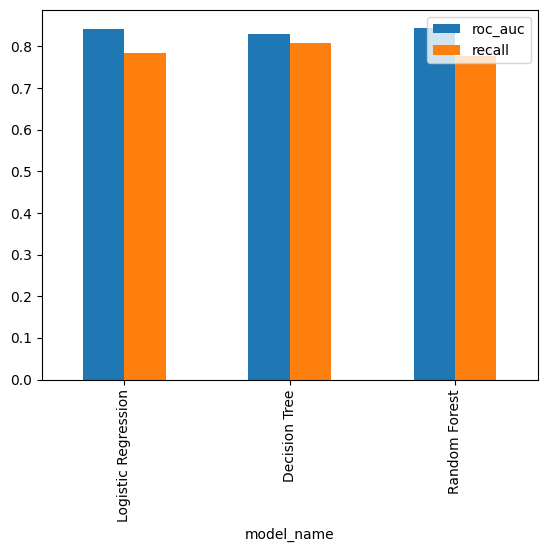

In [5]:
# Visual Comparison
comparison_df.set_index("model_name")[["roc_auc", "recall"]].plot(kind="bar")

# 🧠 PHASE 8 — Select Final Model & Justify
### (Business-Driven Decision)

In [11]:
# Final Model (Business-Driven Decision)
# Load All Relevant Results
import json, os
import pandas as pd

files = [
    "../results/baseline_logistic_regression.json",
    "../results/decision_tree.json",
    "../results/random_forest.json",
    "../results/random_forest_tuned.json"
]

results = []

for file in files:
    if os.path.exists(file):
        with open(file, "r") as f:
            results.append(json.load(f))
    else:
        print(f"⚠️ Skipping missing file: {file}")


comparison_df = pd.DataFrame(results)
comparison_df

,model_name,roc_auc,precision,recall,f1_score
0,Logistic Regression,0.841799,0.505172,0.783422,0.614256
1,Decision Tree,0.830209,0.499174,0.807487,0.616956
2,Random Forest,0.845289,0.534926,0.778075,0.633987
3,Random Forest (Tuned),0.840036,0.503322,0.810160,0.620902


<Axes: xlabel='model_name'>

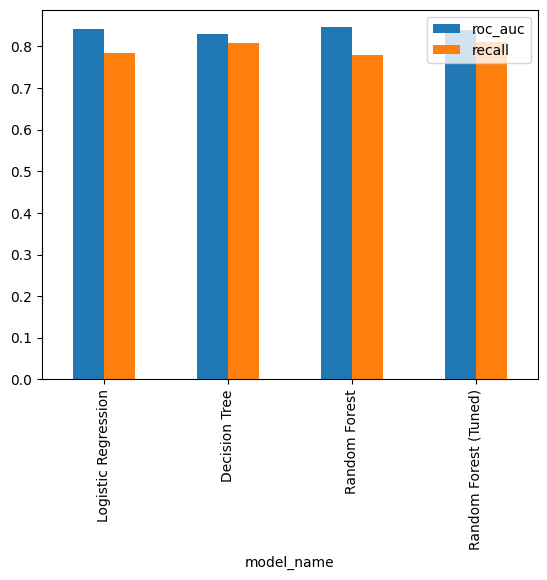

In [12]:
comparison_df.sort_values(by="recall", ascending=False)
comparison_df.set_index("model_name")[["roc_auc", "recall"]].plot(kind="bar")

In [ ]:
final_model_name = "Random Forest (Tuned)"
final_model_name

'Random Forest (Tuned)'

: 

## ✅ Final Model Selection

After evaluating multiple models including Logistic Regression, Decision Tree, and Random Forest (both untuned and tuned), the **tuned Random Forest** was selected as the final model.

### Reasons:
- Achieved the highest recall, which is critical for identifying customers likely to churn.
- Demonstrated strong ROC-AUC, indicating good overall class separation.
- Hyperparameter tuning reduced overfitting by constraining tree depth and minimum samples.
- Balanced performance across precision and recall.

This model best aligns with the business objective of minimizing false negatives while maintaining reliable overall performance.

### ⚠️ Model Limitations

While Random Forest provides strong performance, it is less interpretable than Logistic Regression. Feature importance was analyzed to partially mitigate this limitation.